In [1]:
# Bert Topic Modeling With Full Library
!pip install bertopic
!pip install bertopic[visualization]
!pip install hdbscan
!pip install --upgrade joblib==1.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 12.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.2 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039292 sha256=ec8a51b94d54014de71e2d497aa6e029ccd12a0db6a65d571e376ecef72eebb0
  Stored in di

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install gensim

In [4]:
import pandas as pd
import numpy as np
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud
from bertopic import BERTopic
from umap import UMAP

In [5]:
#data_clean = pd.read_csv('/content/drive/MyDrive/Text Classification 2023/DataKratomFinal4.csv')
#data_clean.head()

TWEET_DATA = pd.read_csv('/content/drive/MyDrive/Text Classification 2023/DataKratomFinal5.csv')

TWEET_DATA['text_normal'].head()

0    korth also known herbal prepar therapeut prope...
1    mitragynin analges alkaloid offer safer altern...
2    contain variou alkaloid induc pharmacolog effe...
3    consumpt herbal substanc result advers health ...
4    chronic neuropath pain sever detriment overal ...
Name: text_normal, dtype: object

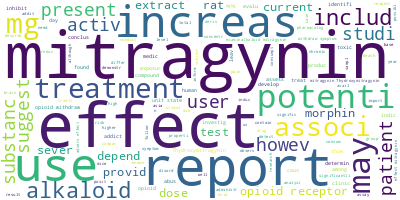

In [6]:
# Join the different processed titles together.
long_string = ','.join(list(TWEET_DATA['text_normal'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [7]:
model = BERTopic(verbose=True, nr_topics=6, calculate_probabilities=True)

docs = TWEET_DATA.text_normal.to_list()

topics, probabilities = model.fit_transform(docs)

2024-01-04 04:34:08,303 - BERTopic - Embedding - Transforming documents to embeddings.


.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/13 [00:00<?, ?it/s]

2024-01-04 04:36:02,303 - BERTopic - Embedding - Completed ✓
2024-01-04 04:36:02,306 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-04 04:36:14,716 - BERTopic - Dimensionality - Completed ✓
2024-01-04 04:36:14,719 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-04 04:36:14,778 - BERTopic - Cluster - Completed ✓
2024-01-04 04:36:14,780 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-04 04:36:14,922 - BERTopic - Representation - Completed ✓
2024-01-04 04:36:14,923 - BERTopic - Topic reduction - Reducing number of topics
2024-01-04 04:36:15,045 - BERTopic - Topic reduction - Reduced number of topics from 7 to 6


In [ ]:
docs = TWEET_DATA.text_normal.to_list()

# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language="multilingual", calculate_probabilities=True, nr_topics=5)
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(docs)

2023-10-20 08:17:50,219 - BERTopic - Transformed documents to Embeddings
2023-10-20 08:17:52,976 - BERTopic - Reduced dimensionality
2023-10-20 08:17:53,007 - BERTopic - Clustered reduced embeddings
2023-10-20 08:17:53,113 - BERTopic - Reduced number of topics from 4 to 4


In [ ]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,82,-1_effect_mitragynin_use_user,"[effect, mitragynin, use, user, report, extrac...",[indigen known tradit addict potenti asia year...
1,0,149,0_mitragynin_alkaloid_effect_opioid,"[mitragynin, alkaloid, effect, opioid, recepto...",[mitragynin indol alkaloid isol previous repor...
2,1,111,1_opioid_report_pain_withdraw,"[opioid, report, pain, withdraw, user, effect,...",[opioidreceptor mediat effect emerg potenti su...
3,2,20,2_exposur_poison_report_associ,"[exposur, poison, report, associ, effect, amon...",[interest remedi increas western countri recen...
4,3,20,3_mitragynin_concentr_case_report,"[mitragynin, concentr, case, report, detect, d...",[substanc major chemic compon mitragynin eluci...
5,4,13,4_liver_injuri_dili_report,"[liver, injuri, dili, report, hepatotox, herba...",[druginduc liver injuri dili among common caus...


In [ ]:
model.get_topic_freq().head(6)

,Topic,Count
1,0,149
3,1,111
0,-1,82
2,2,20
5,3,20
4,4,13


In [ ]:
model.get_topic(3)

[('mitragynin', 0.08877240579988313),
 ('concentr', 0.05815090938097956),
 ('case', 0.053425394718186595),
 ('death', 0.04853821684655088),
 ('forens', 0.04241647690813973),
 ('report', 0.04130313006833822),
 ('speci', 0.038665327765997064),
 ('blood', 0.03555121956944332),
 ('detect', 0.03439298703511012),
 ('toxic', 0.029682582489184556)]

In [ ]:
model.visualize_topics()

In [ ]:
# Visualize connections between topics using hierachical clustering
model.visualize_hierarchy(top_n_topics=5)

In [ ]:
model.visualize_barchart()

In [ ]:
model.visualize_heatmap()

In [ ]:
#topic_model.visualize_distribution(probabilities[0])
model.visualize_distribution(model.probabilities_[0], min_probability=0.015)

In [ ]:
# Evaluation With Topic Coherence

documents = pd.DataFrame({"Document": docs,
                          "ID": range(len(docs)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
clean_docs = model._preprocess_text(documents_per_topic.Document.values)

def calculate_coherence_score(topic_model):
  #variable
  topic_words = topic_words = [[words for words, _ in model.get_topic(topic) if words!=''] for topic in range(len(set(topics))-1)]
  vectorizer = model.vectorizer_model
  tokenizer = vectorizer.build_tokenizer()
  #dictionary
  tokens = [doc.split() for doc in clean_docs]
  dictionary = corpora.Dictionary(tokens)
  corpus = [dictionary.doc2bow(token) for token in tokens]

  #coherence dapat diisi dengan 'u_mass' atau 'c_v' atau 'c_npmi
  coherence_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='u_mass')
  coherence = coherence_model.get_coherence()

  #print (corpus)
  return coherence

print ('Nilai Coherence U_MASS')

calculate_coherence_score(model)

Nilai Coherence U_MASS


1.0000889005818412e-12